In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Create folders to store CSVs if not exist
os.makedirs("basic_CSVs", exist_ok=True)
os.makedirs("detailed_CSVs", exist_ok=True)

In [ ]:
# List of tickers to process
tickers = [
    "AAPL", "ABBV", "ABT", "ACN", "ADBE", "AIG", "AMGN", "AMT", "AMZN", "AVGO",
    "AXP", "BA", "BAC", "BK", "BKNG", "BLK", "BMY", "BRK.B", "C", "CAT",
    "CHTR", "CL", "CMCSA", "COF", "COP", "COST", "CRM", "CSCO", "CVS", "CVX",
    "DHR", "DIS", "DOW", "DUK", "EMR", "EXC", "F", "FDX", "GD", "GE",
    "GILD", "GM", "GOOG", "GS", "HD", "HON", "IBM", "INTC", "INTU", "JNJ",
    "JPM", "KHC", "KO", "LIN", "LLY", "LMT", "LOW", "MA", "MCD", "MDLZ",
    "MDT", "MET", "META", "MMM", "MO", "MRK", "MS", "MSFT", "NEE", "NFLX",
    "NKE", "NVDA", "ORCL", "PEP", "PFE", "PG", "PM", "PYPL", "QCOM", "RTX",
    "SBUX", "SO", "SPG", "T", "TGT", "TMO", "TMUS", "TSLA", "TXN", "UNH",
    "UNP", "UPS", "USB", "V", "VZ", "WBA", "WFC", "WMT", "XOM"
]


# Start and end dates
start_date = "2020-01-01"
end_date = "2024-01-01"

In [ ]:
def load_data(ticker):
    df = pd.read_csv(f"basic_CSVs/{ticker}_data.csv")
    return df

In [12]:
def clean_data(df):
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
    df = df.dropna(subset=['Close', 'Volume'])
    return df

In [13]:
def calculate_moving_averages(df):
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA100'] = df['Close'].rolling(window=100).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df

def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

def normalize_volume(df, window=50):
    df['Norm_Volume'] = df['Volume'] / df['Volume'].rolling(window=window).mean()
    return df

def calculate_bollinger_bands(df, window=20, num_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * num_std)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * num_std)
    return df

def calculate_additional_returns(df):
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Pct_Change'] = df['Close'].pct_change()
    return df

In [ ]:
def process_multiple_stocks(ticker_list, start_date, end_date, save_combined=True):
    all_data = []

    for ticker in ticker_list:
        try:
            print(f"\nProcessing {ticker}...")

            # Download and save raw data
            data = yf.download(ticker, start=start_date, end=end_date)
            data.reset_index(inplace=True)
            data.to_csv(f"basic_CSVs/{ticker}_data.csv", index=False)

            # Load and process
            df = load_data(ticker)
            df = clean_data(df)
            df = calculate_moving_averages(df)
            df = calculate_rsi(df)
            df = normalize_volume(df)
            df = calculate_bollinger_bands(df)
            df = calculate_additional_returns(df)

            df = df.dropna()
            df['Ticker'] = ticker  # Add stock symbol

            # Save individual file
            df.to_csv(f"detailed_CSVs/{ticker}_stock_features.csv", index=False)
            all_data.append(df)

            print(f"Saved features for {ticker}")

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

    # Save combined file
    if save_combined and all_data:
        combined_df = pd.concat(all_data, axis=0)
        combined_df.to_csv("combined_stock_features.csv", index=False)
        print("\n✅ Combined dataset saved to 'combined_stock_features.csv'")



In [15]:
process_multiple_stocks(tickers, start_date, end_date, save_combined=True)


Processing AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Saved features for AAPL

Processing MSFT...


[*********************100%***********************]  1 of 1 completed


Saved features for MSFT

Processing GOOGL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Saved features for GOOGL

Processing TSLA...
Saved features for TSLA

Processing AMZN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Saved features for AMZN

Processing NVDA...



[*********************100%***********************]  1 of 1 completed


Saved features for NVDA

Processing META...
Saved features for META

Processing JPM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Saved features for JPM

Processing NFLX...
Saved features for NFLX

Processing INTC...


[*********************100%***********************]  1 of 1 completed


Saved features for INTC

✅ Combined dataset saved to 'combined_stock_features.csv'


In [21]:
# Load the enhanced dataset
def load_enhanced_data(ticker="AAPL"):
    df = pd.read_csv(f"features/{ticker}_stock_features.csv")
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime
    df.set_index('Date', inplace=True)
    return df

ticker = "AAPL"
data = load_enhanced_data(ticker)
print(data.head())  # Verify all features are loaded

                 Close        High         Low        Open       Volume  \
Date                                                                      
2020-10-15  117.704170  118.181967  115.207920  115.763726  112559200.0   
2020-10-16  116.056252  118.523258  115.851482  118.259977  115393800.0   
2020-10-19  113.091972  117.421406  112.779941  116.972862  120639300.0   
2020-10-20  114.583847  116.017243  112.750657  113.306463  124423700.0   
2020-10-21  113.959785  115.753963  113.550238  113.764761   89946000.0   

                  MA10        MA50       MA100      MA200        RSI  \
Date                                                                   
2020-10-15  114.778878  114.007474  101.501440  86.176187  63.102305   
2020-10-16  115.363937  114.111273  101.887926  86.392887  56.510594   
2020-10-19  115.313233  114.206199  102.244429  86.598302  52.833620   
2020-10-20  115.737399  114.299467  102.616605  86.808306  52.563294   
2020-10-21  115.911941  114.445634  102.97

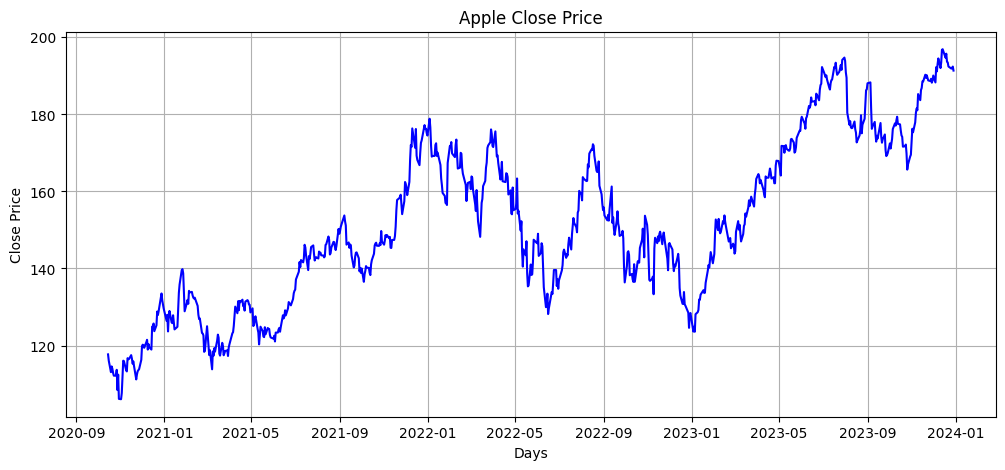

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], color="blue")
plt.title('Apple Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

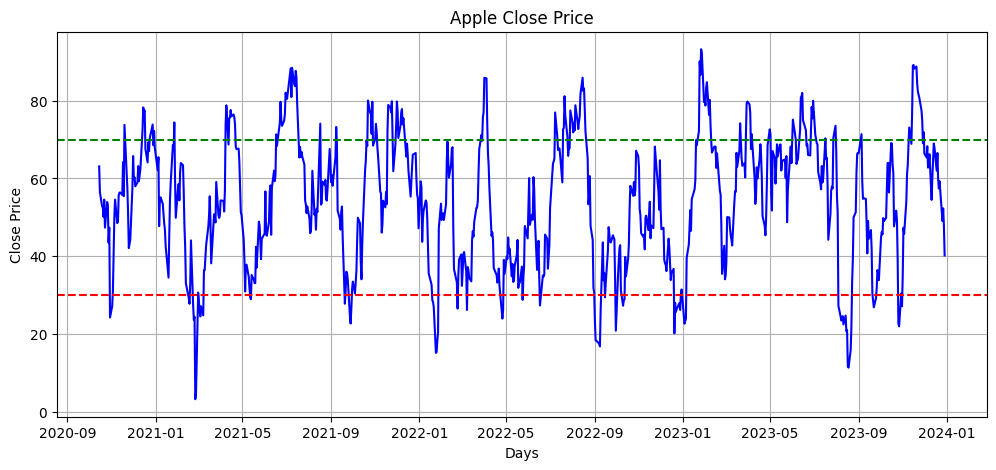

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(data['RSI'], color="blue")
plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
plt.title('Apple Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

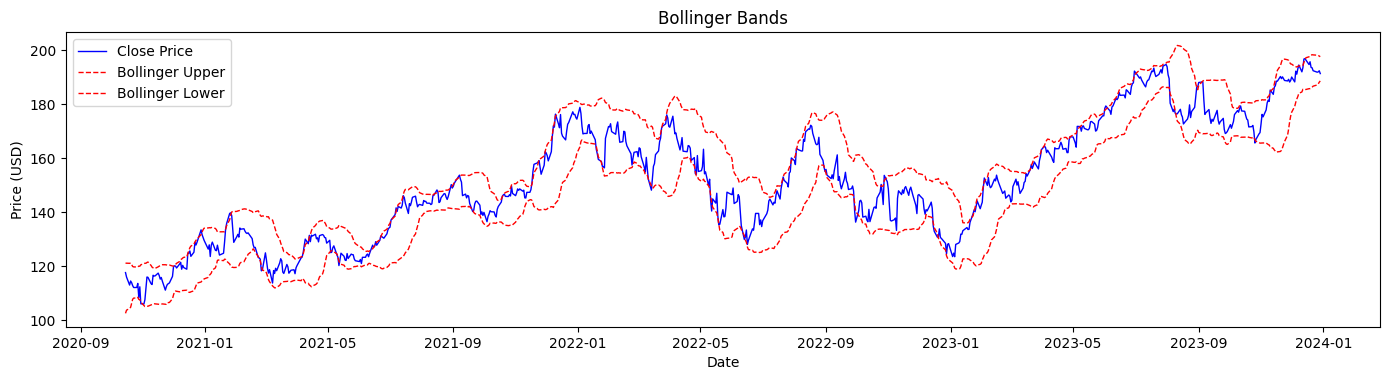

In [27]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(data.index, data['Bollinger_Upper'], label='Bollinger Upper', color='red', linestyle='--', linewidth=1)
plt.plot(data.index, data['Bollinger_Lower'], label='Bollinger Lower', color='red', linestyle='--', linewidth=1)
plt.title('Bollinger Bands')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


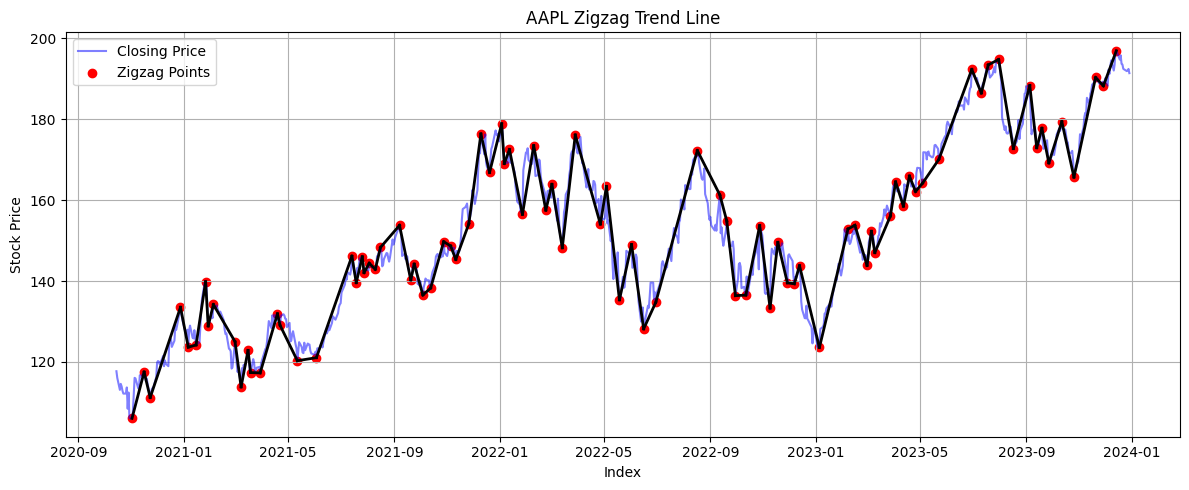

In [28]:
from scipy.signal import argrelextrema
prices = data['Close'].values
# Define the Zigzag indicator
def zigzag_indicator(prices, order=5):
    peaks = argrelextrema(prices, np.greater, order=order)[0]
    valleys = argrelextrema(prices, np.less, order=order)[0]
    zigzag_points = np.sort(np.concatenate((peaks, valleys)))
    return zigzag_points

# Get zigzag points
zigzag_points = zigzag_indicator(prices, order=5)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(data.index, prices, label="Closing Price", color="blue", alpha=0.5)
plt.scatter(data.index[zigzag_points], prices[zigzag_points], color="red", label="Zigzag Points", marker="o")

# Draw straight-line zigzag trend
for i in range(len(zigzag_points) - 1):
    x1 = data.index[zigzag_points[i]]
    x2 = data.index[zigzag_points[i + 1]]
    y1 = prices[zigzag_points[i]]
    y2 = prices[zigzag_points[i + 1]]
    plt.plot([x1, x2], [y1, y2], color="black", linewidth=2)

plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.title("AAPL Zigzag Trend Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

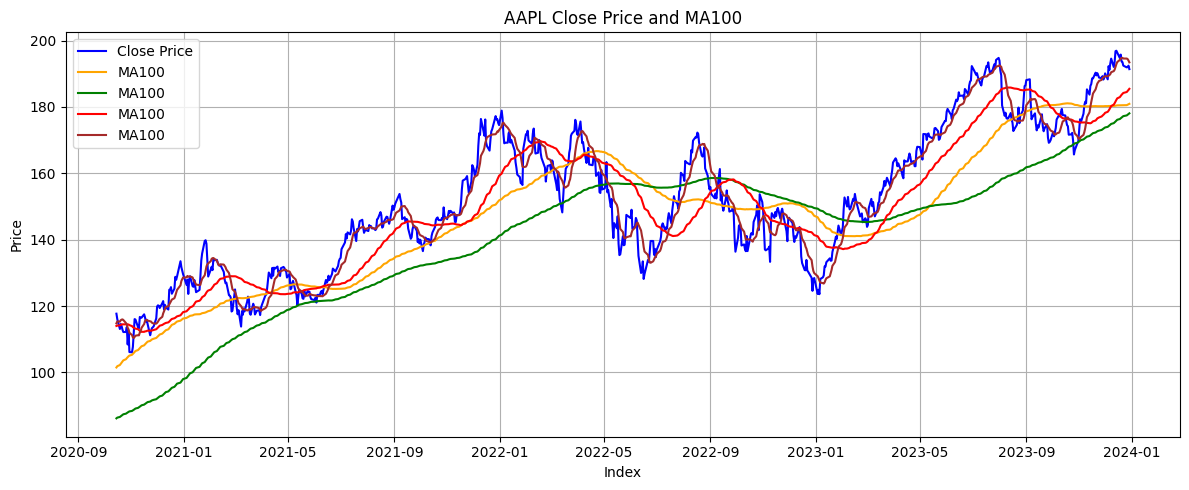

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'], label="Close Price", color='blue')
plt.plot(data.index, data['MA100'], label="MA100", color='orange')
plt.plot(data.index, data['MA200'], label="MA100", color='green')
plt.plot(data.index, data['MA50'], label="MA100", color='red')
plt.plot(data.index, data['MA10'], label="MA100", color='brown')

plt.xlabel("Index")  # Change to 'Date' if you set datetime index
plt.ylabel("Price")
plt.title("AAPL Close Price and MA100")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

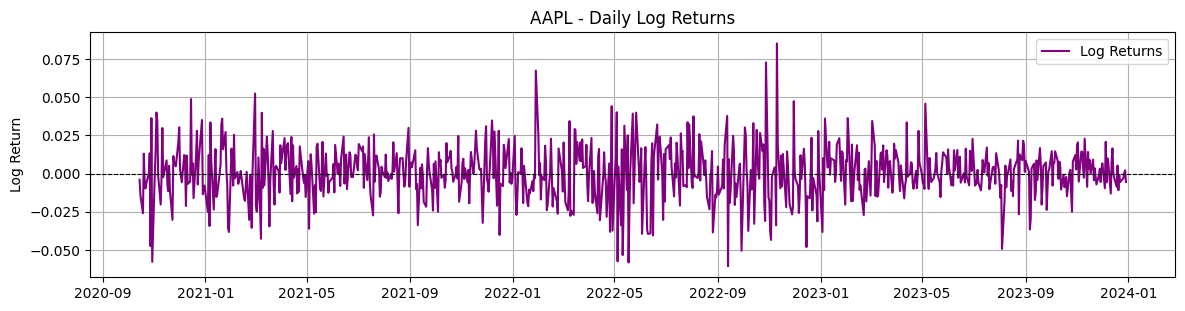

In [33]:
plt.figure(figsize=(14, 7))

# Log Returns
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Log_Returns'], label='Log Returns', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title(f'{ticker} - Daily Log Returns')
plt.ylabel('Log Return')
plt.grid(True)
plt.legend()

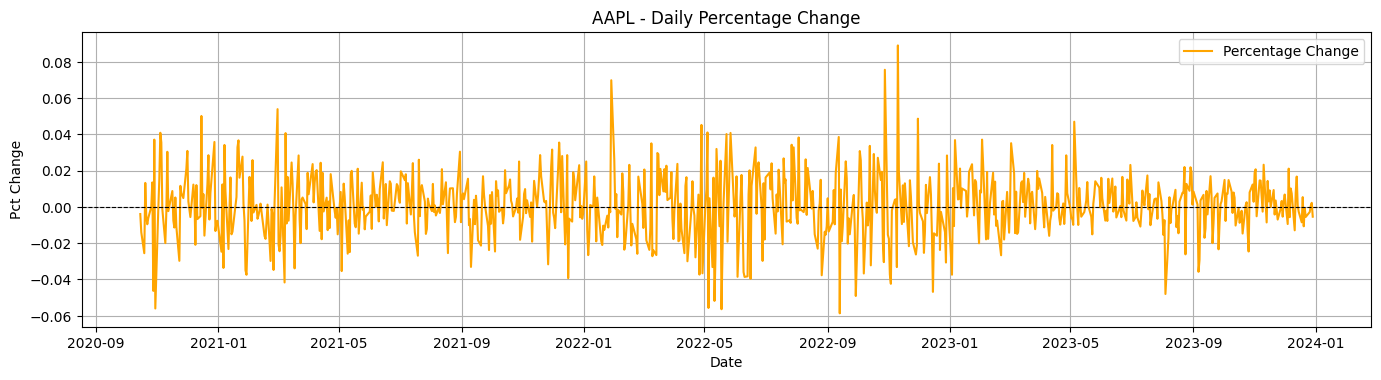

In [35]:
# Percentage Change
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Pct_Change'], label='Percentage Change', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title(f'{ticker} - Daily Percentage Change')
plt.ylabel('Pct Change')
plt.xlabel('Date')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()